In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mc_pion = pd.read_csv("Pion_300MeV_500000_1photon_0plus.txt")
mc_compton = pd.read_csv("Compton_300MeV_20000_1photon_0plus.txt")


In [4]:
mc_compton.head()
mc_compton['id'] = mc_compton['id'].replace([2], 1)

In [5]:
mc_compton

,E_beam,E_gamma,theta_gamma,phi_gamma,ncryst,MM,id
0,300.745,229.152,73.378,164.764,10,957.242,1
1,300.745,188.669,133.052,65.717,7,948.543,1
2,300.745,269.853,36.873,74.898,10,951.773,1
3,300.745,288.181,29.989,-66.362,6,938.478,1
4,300.745,235.543,74.968,24.534,8,947.519,1
...,...,...,...,...,...,...,...
16515,300.745,258.153,68.634,-46.459,9,928.219,1
16516,300.745,228.147,101.664,-68.264,8,922.839,1
16517,300.745,280.105,38.087,-15.582,12,939.802,1
16518,300.745,274.839,40.509,-57.557,11,943.059,1


In [6]:
mc_pion

,E_beam,E_gamma,theta_gamma,phi_gamma,ncryst,MM,id
0,300.745,209.042,40.354,24.188,8,1011.206,2
1,300.745,231.604,38.959,95.216,9,989.511,2
2,300.745,82.609,75.814,-128.971,7,1119.019,2
3,300.745,188.412,99.159,138.558,6,979.695,2
4,300.745,109.208,67.185,-130.005,7,1095.254,2
...,...,...,...,...,...,...,...
72359,300.745,52.080,72.003,105.809,4,1151.242,2
72360,300.745,117.730,140.538,-44.118,6,1048.009,2
72361,300.745,78.029,105.280,169.260,7,1113.107,2
72362,300.745,142.714,60.953,171.022,8,1064.312,2


In [7]:
mc_sum = mc_compton.append(mc_pion, ignore_index=True)

mc_sum.head()
mc_sum.drop(["E_beam"], axis = 1, inplace = True)
#mc_sum.drop(["phi_gamma"], axis = 1, inplace = True)
#mc_sum.drop(["phi_p"], axis = 1, inplace = True)

C:\Users\Khach\AppData\Local\Temp\ipykernel_18108\2616440465.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mc_sum = mc_compton.append(mc_pion, ignore_index=True)


In [8]:
mc_sum_reshuffle2 = mc_sum.sample(frac = 1).reset_index()
mc_sum_reshuffle2.drop("index", axis =1, inplace = True)

In [9]:
mc_sum_reshuffle2.head()

,E_gamma,theta_gamma,phi_gamma,ncryst,MM,id
0,30.774,27.818,-75.435,4,1176.795,2
1,210.064,90.153,175.178,11,961.170,2
2,35.937,68.695,-68.741,4,1167.705,2
3,117.680,101.815,-104.576,6,1067.064,2
4,258.667,50.271,-9.376,11,950.362,1


In [10]:
mc_sum_reshuffle2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88884 entries, 0 to 88883
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   E_gamma      88884 non-null  float64
 1   theta_gamma  88884 non-null  float64
 2   phi_gamma    88884 non-null  float64
 3   ncryst       88884 non-null  int64  
 4   MM           88884 non-null  float64
 5   id           88884 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 4.1 MB


In [11]:
#mc_sum_reshuffle2_theta = mc_sum_reshuffle2
#mc_sum_reshuffle2_theta = mc_sum_reshuffle2[mc_sum_reshuffle2_theta["theta_gamma"] > 30.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["theta_gamma"] > 40.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["theta_gamma"] < 140.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["MM"] < 1000.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["MM"] > 920.]


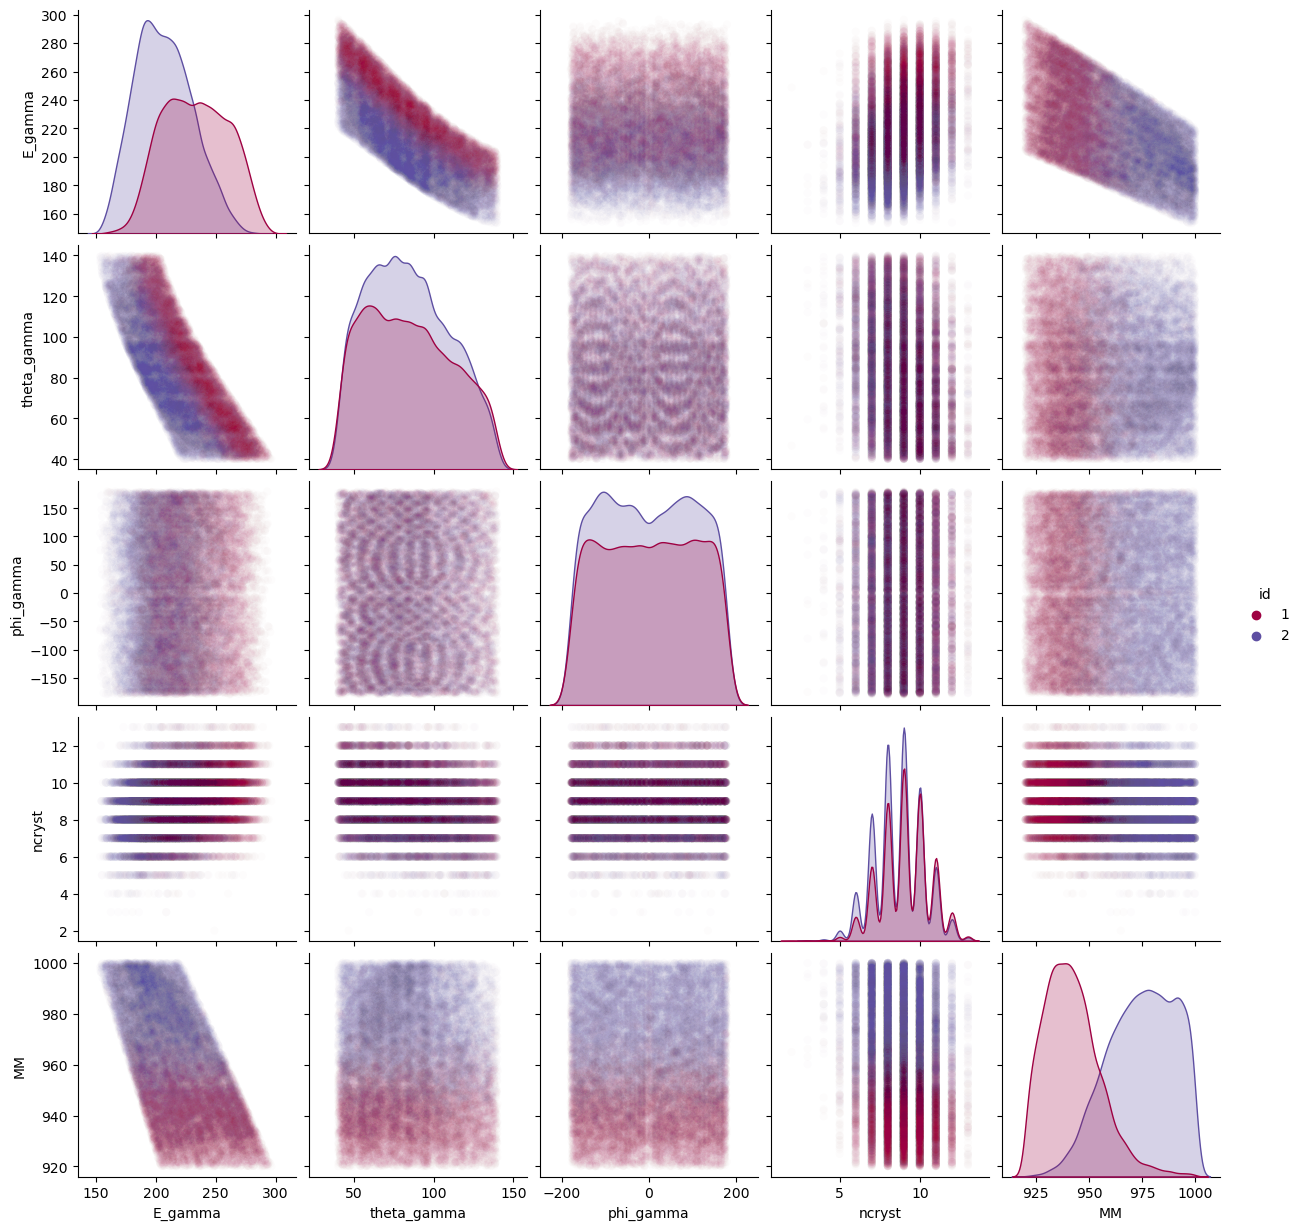

In [12]:
sns.pairplot(mc_sum_reshuffle2, hue = "id",  kind='scatter', plot_kws={'alpha':0.01}, palette='Spectral')

In [18]:
#mc_compton.drop(["E_beam"], axis = 1, inplace = True)
#mc_compton.drop(["phi_gamma"], axis = 1, inplace = True)
#mc_compton.drop(["phi_p"], axis = 1, inplace = True)

In [11]:
#mc_compton.drop(["id"], axis = 1, inplace = True)

<AxesSubplot:>

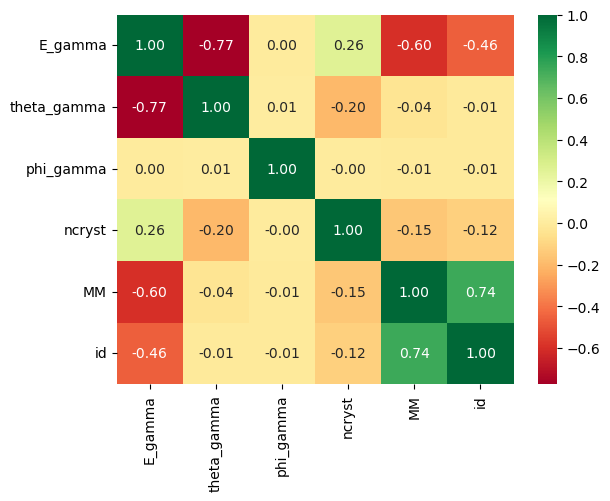

In [14]:
sns.heatmap(mc_sum_reshuffle2.corr(), annot = True, fmt='.2f', cmap='RdYlGn')

In [15]:
mc_sum_reshuffle3 = mc_sum_reshuffle2[np.isfinite(mc_sum_reshuffle2).all(1)]


In [16]:
mc_sum_reshuffle3.head(2)  

,E_gamma,theta_gamma,phi_gamma,ncryst,MM,id
1,210.064,90.153,175.178,11,961.170,2
4,258.667,50.271,-9.376,11,950.362,1


In [17]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
# applying label encoder to whole dataset...
#mc_sum_reshuffle3 = mc_sum_reshuffle3.apply(label_encoder.fit_transform)

# checking the result
#mc_sum_reshuffle3.head(2)  

In [18]:
from sklearn.model_selection import train_test_split
#X = mc_sum_reshuffle3[['E_gamma', 'theta_gamma', 'E_p', 'theta_p']]
#y = mc_sum_reshuffle3['MM']
#y = mc_pion['id']
X = mc_sum_reshuffle3[['E_gamma', 'theta_gamma', 'MM', 'ncryst', 'phi_gamma']]
y = mc_sum_reshuffle3['id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [19]:
X_test.head(2)

,E_gamma,theta_gamma,MM,ncryst,phi_gamma
37429,187.221,85.426,994.873,8,-105.229
16111,200.363,69.170,995.530,8,99.420


In [20]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [22]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.84      0.86      0.85      3882
           2       0.88      0.87      0.88      4810

    accuracy                           0.86      8692
   macro avg       0.86      0.86      0.86      8692
weighted avg       0.86      0.86      0.86      8692

[[3322  560]
 [ 619 4191]]


In [23]:
#from sklearn.model_selection import GridSearchCV
#param_grid = [
#    {'C': 10**np.linspace(-3,3,20)}
#]
#lin_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

#lr_gridsearch = GridSearchCV(lin_reg, param_grid, cv=10, scoring='accuracy', 
#                             refit=True)
#lr_gridsearch.fit(X_train, y_train)
#print(lr_gridsearch.best_score_)
#print(lr_gridsearch.best_params_)
#predictions = lr_gridsearch.predict(X_test)


In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

In [25]:
#y_hats = model.predict(X_test)
#y_test['preds'] = predictions
#frame = {'preds': predictions}
#result = pd.DataFrame(y_test)
#result.rename(columns = {'id':'id_pred'}, inplace = True)

address = [predictions] 
# Using 'Address' as the column name
# and equating it to the list
X_test["id_predicted"] = predictions

y_test_array = y_test.to_numpy() 

#difference = [predictions - y_test] 
X_test["id_initial"] = y_test_array
#X_test.drop(["difference"], axis = 1, inplace = True)

difference = (predictions - y_test_array) 
X_test["difference"] = difference

X_test.head(10)

,E_gamma,theta_gamma,MM,ncryst,phi_gamma,id_predicted,id_initial,difference
37429,187.221,85.426,994.873,8,-105.229,2,2,0
16111,200.363,69.170,995.530,8,99.420,2,2,0
46041,172.827,122.440,980.153,10,-135.241,2,2,0
60497,198.916,71.288,995.086,9,12.561,2,2,0
77891,183.809,87.788,996.752,10,-101.702,2,2,0
66781,217.890,94.662,945.590,9,154.999,1,1,0
76065,190.027,79.232,997.595,9,-49.143,2,2,0
11556,223.603,77.257,959.324,10,-2.084,2,1,1
4067,225.554,94.225,935.846,8,8.531,1,1,0
41069,222.307,76.929,961.295,8,0.523,2,1,1


<AxesSubplot:xlabel='MM', ylabel='theta_gamma'>

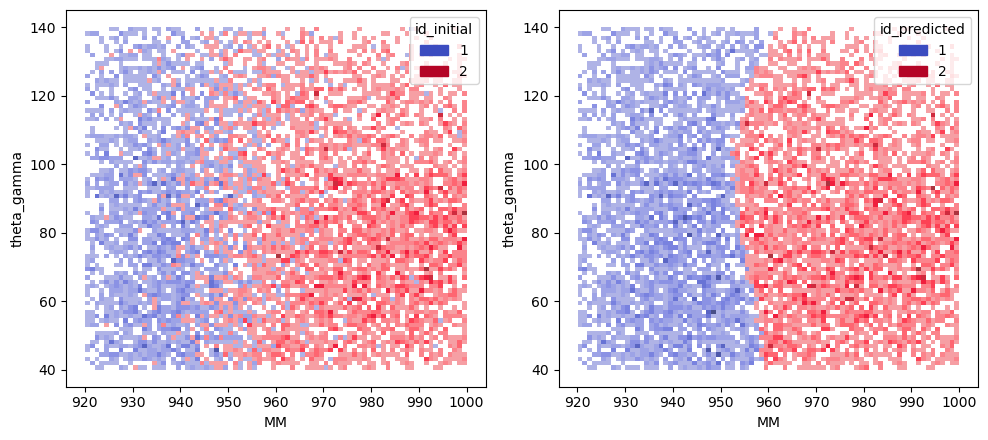

In [26]:
#sns.pairplot(X_test, hue = "difference",  kind='scatter', plot_kws={'alpha':0.03}, palette='coolwarm')
#sns.histplot(data = X_test, x = 'MM', y = 'theta_gamma', hue= 'id_initial', palette='coolwarm', bins = 80)
#sns.histplot(data = X_test, x = 'MM', hue= 'id_predicted', palette='coolwarm', bins = 100)
#ratio = X_test['id_predicted']/X_test['id_initial']
#sns.histplot(data = X_test, x = 'id_predicted', y = 'id_initial', palette='coolwarm')
#sns.histplot(data = X_test, x = 'MM', palette='coolwarm', hue = 'difference', bins = 100)

plt.rcParams["figure.figsize"] = [10.0, 4.5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.histplot(data = X_test, x = 'MM', y = 'theta_gamma', hue= 'id_initial', palette='coolwarm', bins = 80, ax=axes[0])
sns.histplot(data = X_test, x = 'MM', y = 'theta_gamma', hue= 'id_predicted', palette='coolwarm', bins = 80, ax=axes[1])
